# Importing Python Packages

In [52]:
import openpyxl
import xlrd
import os
import glob

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

In [53]:
# import python packages

# import nltk (natural language tool kit)
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import requests
from lxml import html
import csv
import pandas as pd

from os import path

import matplotlib.pyplot as plt
%matplotlib inline


#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))

# Importing Data

## Opening the Correct Directory

In [54]:
os.chdir('C:\\Users\\millsj.ADMIN\\Desktop\\GENBA 894\\2018_DataChallenges_Teradata\\Bike Teams\\')

In [55]:
# filenames
excel_names = ["2013-2017 Bike teams.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
biketeams = pd.concat(frames)

# Check headers
biketeams.head(3)

,Event Type,Internal Event Name,Event ID,Team ID,Team Name,Team Creation Date,Team Captain Contact ID,Captain Email Domain,Team Captain Accept Email,Team Division,...,Total Offline Unconfirmed Gifts($),Team Goal($),Total Confirmed Gifts in Team History($),Previous Event Fiscal Year,Previous Event Internal Name,Previous Event Team Name,Previous Event Confirmed Gifts($),Previous Event Team Members,Event Date,Fiscal Year
0,Bike,ILD Bike MS: Tour de Farms 2013,20718,331040,Neighbors of the West Loop,2013-02-28 16:59:00,9947627.0,aol.com,1.0,Association,...,0.0,0.0,0.00,NaN,NaN,NaN,0.00,0,2013-06-22 11:50:00,2013.0
1,Bike,NCT 2016 Bike MS: Breakaway to the Beach,27693,457415,Team Left Hand,2015-12-02 17:59:00,14708446.0,gmail.com,1.0,Beer/Brewery,...,545.0,45000.0,155341.06,2016.0,NCT 2015 Bike MS: Breakaway to the Beach,Team Left Hand,46838.81,51,2016-10-08 13:10:00,2017.0
2,Bike,NCT 2016 Bike MS: Breakaway to the Beach,27693,457565,Unknown-Dornier Cycling,2015-12-04 04:30:00,8688799.0,gmail.com,1.0,Beer/Brewery,...,780.0,40000.0,103551.96,2016.0,NCT 2015 Bike MS: Breakaway to the Beach,Unknown-Dornier Cycling,22108.25,18,2016-10-08 13:10:00,2017.0


In [23]:
# convert string to integers
#biketeams['Team Captain Accept Email'] = (biketeams['Team Captain Accept Email'] == 'TRUE').astype(int)

In [24]:
# make sure the conversion worked
#biketeams.head(3)

# Looking for Data Anomalies

In [25]:
# List of all headers
# biketeams['Team Creation Date','Team Captain Contact ID','Captain Email Domain','Team Captain Accept Email','Team Division','Company','Number of Participants','Total Fees Paid','Team Total Confirmed ($)','Total Online Gifts($)','Total Offline Confirmed Gifts($)','Total Offline Unconfirmed Gifts($)','Team Goal($)','Total Confirmed Gifts in Team History($)','Previous Event Fiscal Year','Previous Event Internal Name','Previous Event Team Name','Previous Event Confirmed Gifts($)','Previous Event Team Members','Event Date','Fiscal Year']

In [56]:
# counting zero values
print((biketeams[['Team Creation Date','Team Captain Contact ID','Captain Email Domain','Team Captain Accept Email','Team Division','Company','Number of Participants','Total Fees Paid','Team Total Confirmed ($)','Total Online Gifts($)','Total Offline Confirmed Gifts($)','Total Offline Unconfirmed Gifts($)','Team Goal($)','Total Confirmed Gifts in Team History($)','Previous Event Fiscal Year','Previous Event Internal Name','Previous Event Team Name','Previous Event Confirmed Gifts($)','Previous Event Team Members','Event Date','Fiscal Year']] == 0).sum())



Team Creation Date                              0
Team Captain Contact ID                         0
Captain Email Domain                            0
Team Captain Accept Email                    8056
Team Division                                   0
Company                                         0
Number of Participants                         21
Total Fees Paid                              3320
Team Total Confirmed ($)                     3197
Total Online Gifts($)                        4197
Total Offline Confirmed Gifts($)             8783
Total Offline Unconfirmed Gifts($)          26245
Team Goal($)                                 8452
Total Confirmed Gifts in Team History($)     2778
Previous Event Fiscal Year                      0
Previous Event Internal Name                    0
Previous Event Team Name                        1
Previous Event Confirmed Gifts($)           24855
Previous Event Team Members                 24638
Event Date                                      0


In [57]:
# Counting missing values
biketeamsnull=(biketeams[['Team Creation Date','Team Captain Contact ID','Captain Email Domain','Team Captain Accept Email','Team Division','Company','Number of Participants','Total Fees Paid','Team Total Confirmed ($)','Total Online Gifts($)','Total Offline Confirmed Gifts($)','Total Offline Unconfirmed Gifts($)','Team Goal($)','Total Confirmed Gifts in Team History($)','Previous Event Fiscal Year','Previous Event Internal Name','Previous Event Team Name','Previous Event Confirmed Gifts($)','Previous Event Team Members','Event Date','Fiscal Year']])

print(biketeamsnull.isnull().sum())


Team Creation Date                              0
Team Captain Contact ID                       552
Captain Email Domain                          698
Team Captain Accept Email                     552
Team Division                                2662
Company                                     23166
Number of Participants                          0
Total Fees Paid                                 0
Team Total Confirmed ($)                        1
Total Online Gifts($)                           0
Total Offline Confirmed Gifts($)                0
Total Offline Unconfirmed Gifts($)              0
Team Goal($)                                    0
Total Confirmed Gifts in Team History($)        1
Previous Event Fiscal Year                  24632
Previous Event Internal Name                24632
Previous Event Team Name                    24631
Previous Event Confirmed Gifts($)               0
Previous Event Team Members                     0
Event Date                                      0


In [58]:
#compute count of values in columns
biketeams['Captain Email Domain'].value_counts()

gmail.com             10915
yahoo.com              3577
hotmail.com            1808
aol.com                1513
comcast.net            1327
verizon.net             537
msn.com                 523
sbcglobal.net           378
me.com                  243
cox.net                 242
att.net                 234
mac.com                 191
charter.net             152
optonline.net           148
bellsouth.net           145
live.com                137
nmss.org                136
outlook.com             128
ymail.com                97
icloud.com               87
earthlink.net            66
deloitte.com             62
roadrunner.com           56
q.com                    55
embarqmail.com           50
rocketmail.com           43
rochester.rr.com         35
suddenlink.net           32
wellsfargo.com           32
wi.rr.com                31
                      ...  
blackbaud.com             1
novacare.com              1
hcblawfirm.com            1
quantronic.net            1
spscommerce.com     

In [59]:


#compute count of values in columns
biketeams['Team Captain Accept Email'].value_counts()

# originally found the following results: "True 24523, False 8056, Friends and Family 1" which identified and data entry error and has been corrected.

1.0    24524
0.0     8056
Name: Team Captain Accept Email, dtype: int64

# Data Analysis

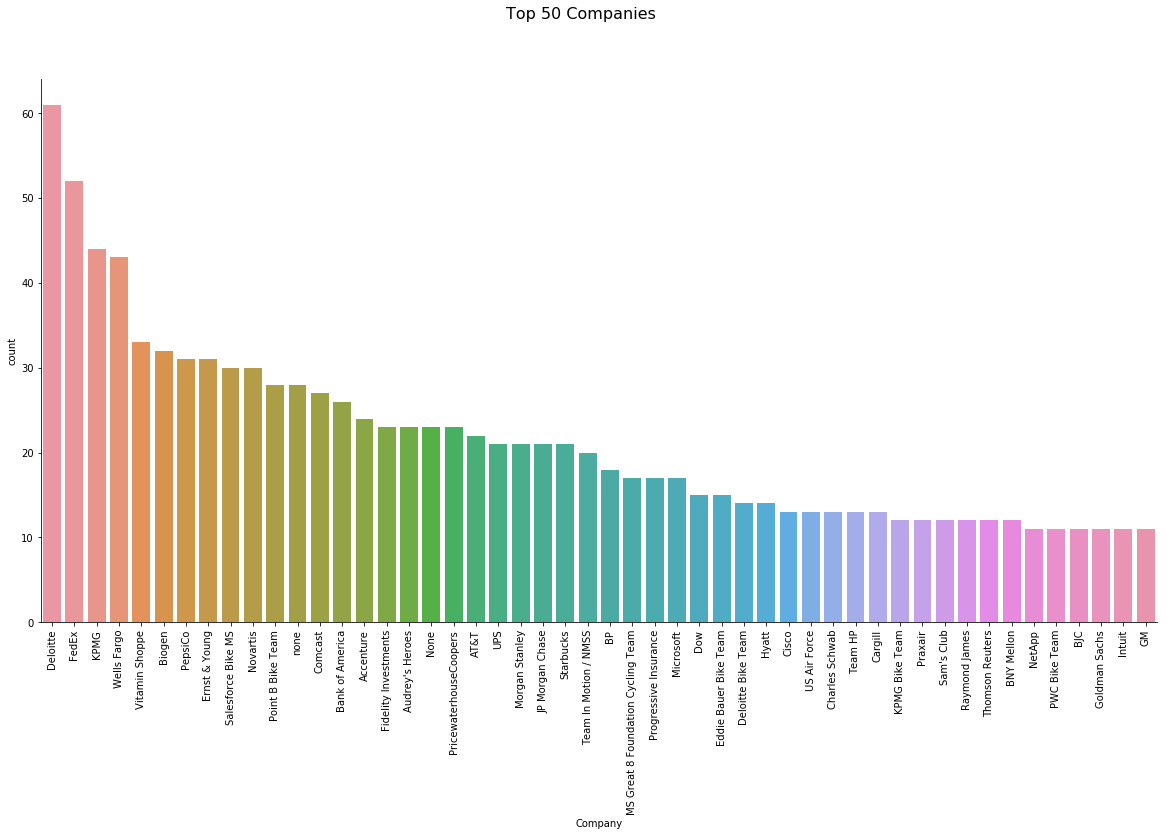

In [30]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Company', data=biketeams,order = biketeams['Company'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Top 50 Companies', fontsize=16)

sns.despine()
#plt.tight_layout()

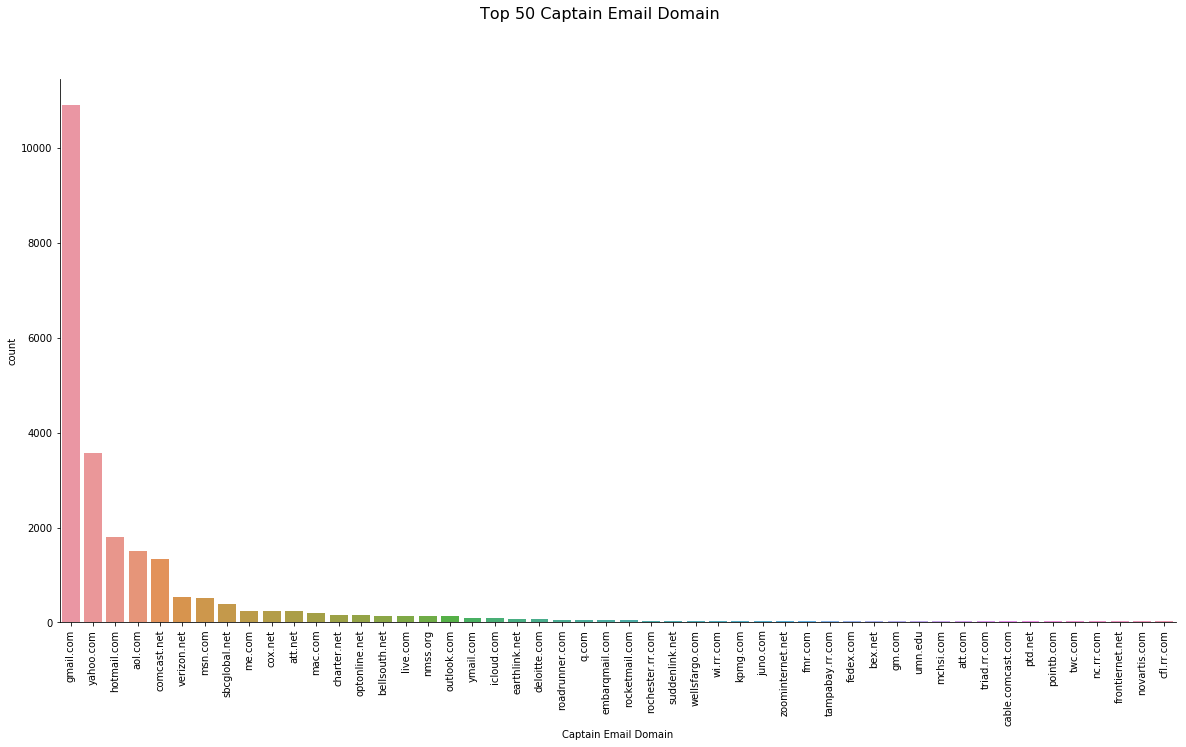

In [31]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Captain Email Domain', data=biketeams,order = biketeams['Captain Email Domain'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Top 50 Captain Email Domain', fontsize=16)

sns.despine()
#plt.tight_layout()

Text(0.5,0.98,'Top 50 Companies by Participants')

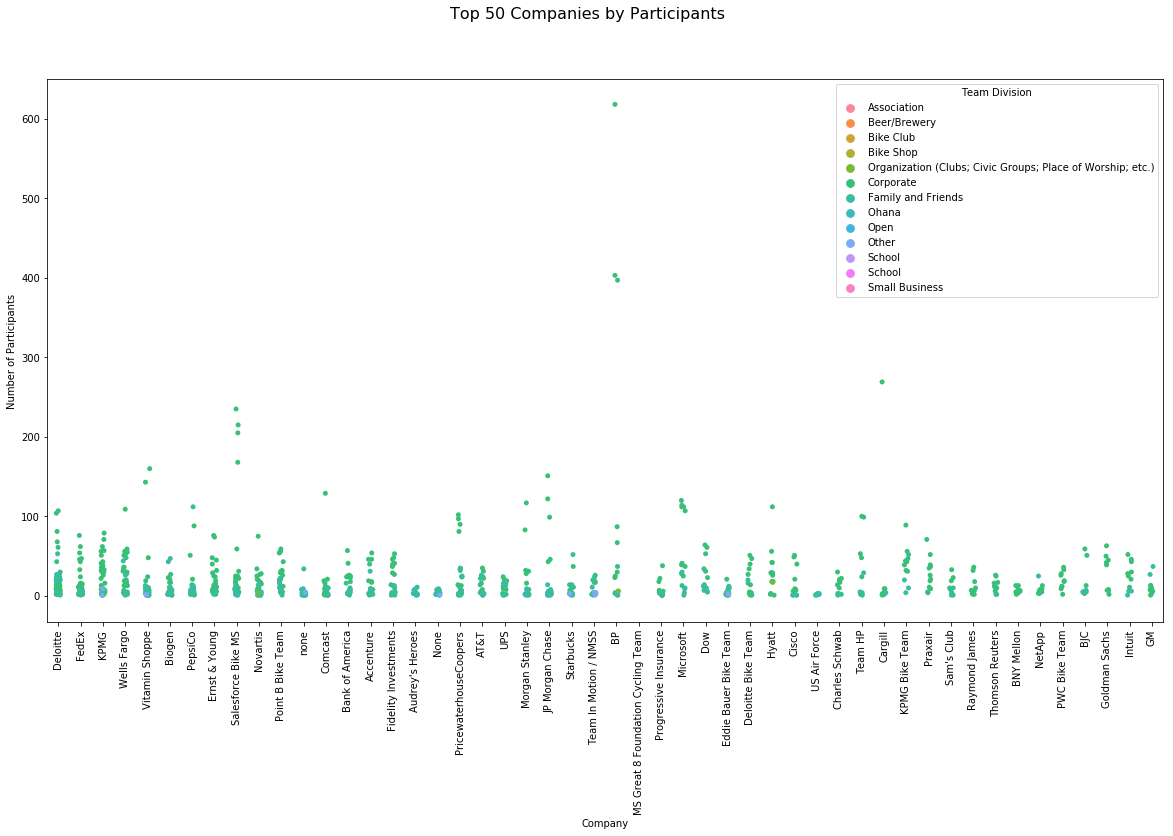

In [32]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Company', y="Number of Participants", hue="Team Division",data=biketeams, order = biketeams['Company'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Top 50 Companies by Participants', fontsize=16)



Text(0.5,0.98,'Top 50 Companies by Team Total Confirmed ($) and Team Division')

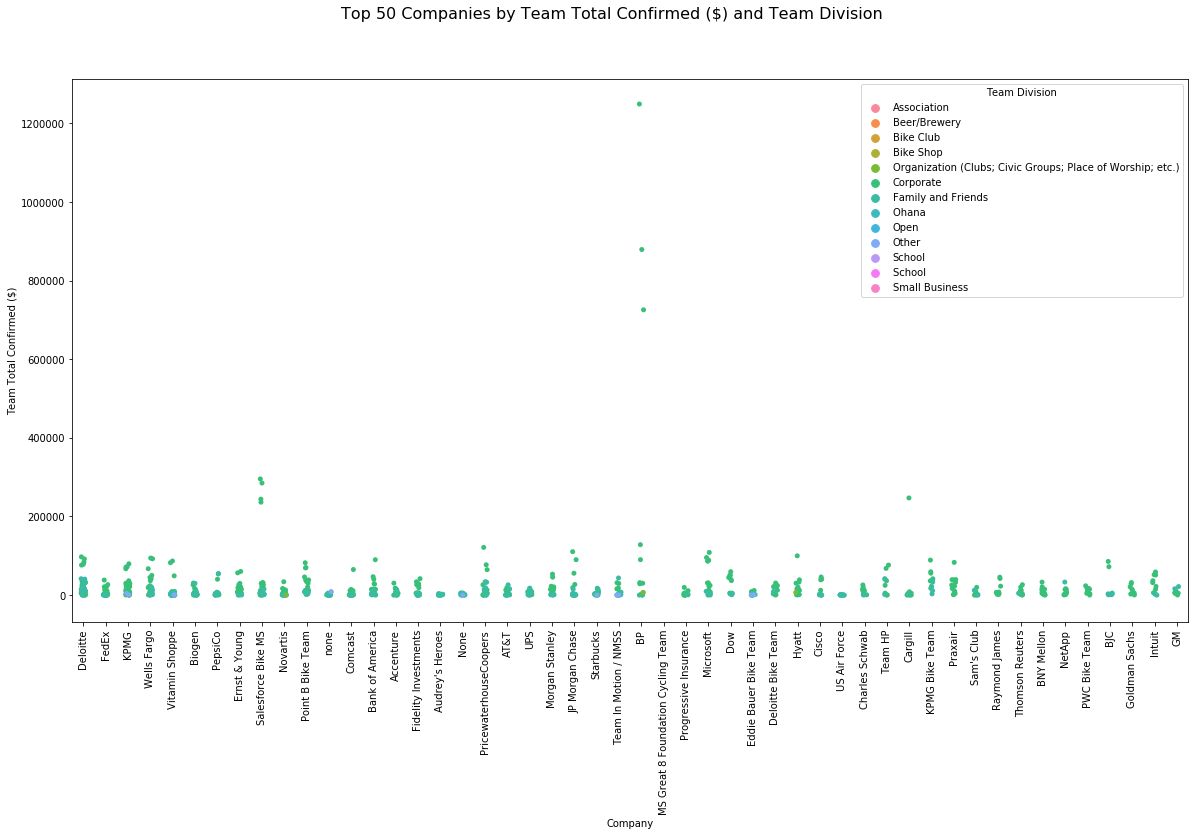

In [46]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Company', y="Team Total Confirmed ($)", hue="Team Division",data=biketeams, order = biketeams['Company'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Top 50 Companies by Team Total Confirmed ($) and Team Division', fontsize=16)



Text(0.5,0.98,'Total Confirmed Gifts in Team History($) by Team Division')

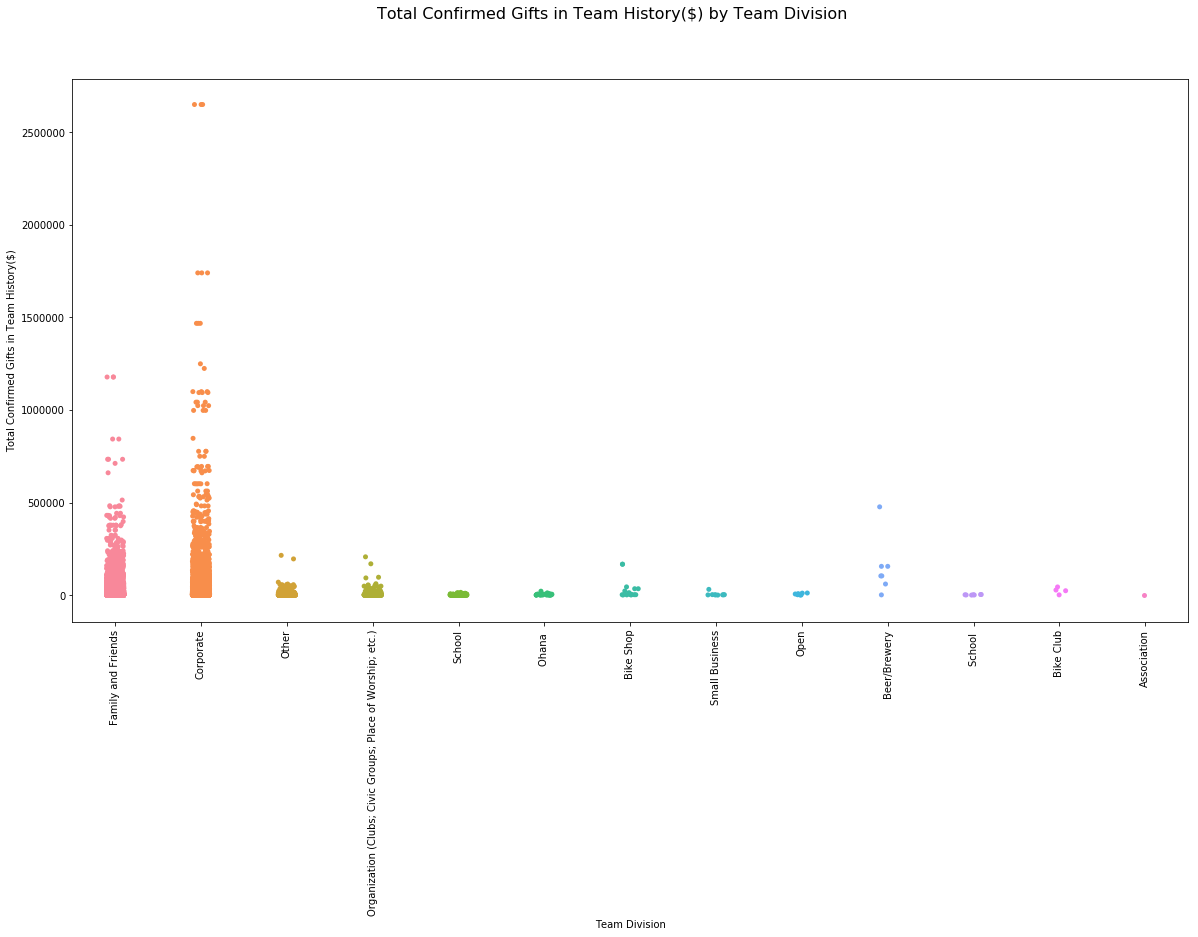

In [35]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Team Division', y="Total Confirmed Gifts in Team History($)", data=biketeams, order = biketeams['Team Division'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total Confirmed Gifts in Team History($) by Team Division', fontsize=16)



Text(0.5,0.98,'Team Total Confirmed ($) by Team Division')

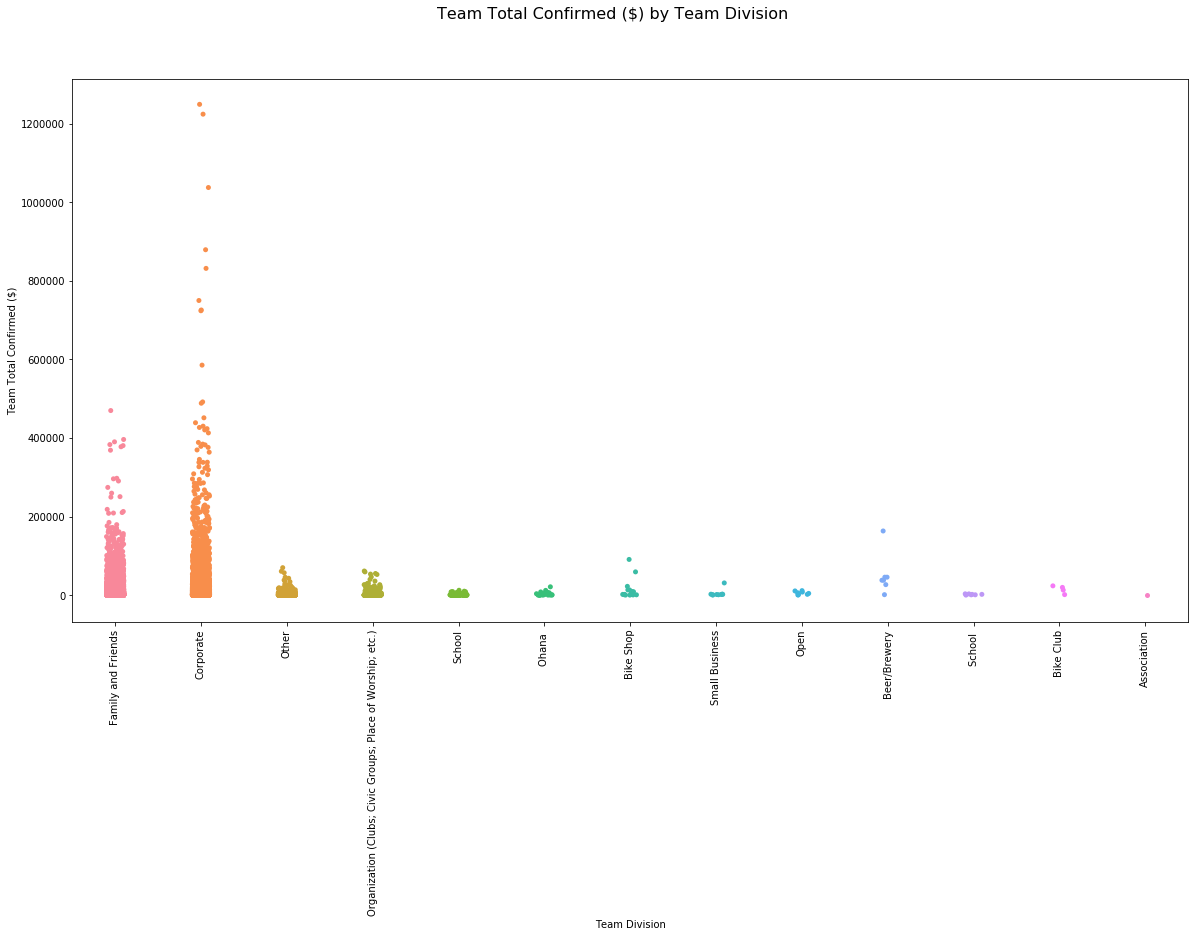

In [44]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Team Division', y="Team Total Confirmed ($)", data=biketeams, order = biketeams['Team Division'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Team Total Confirmed ($) by Team Division', fontsize=16)



Text(0.5,0.98,'Total Offline Confirmed Gifts($) by Team Division')

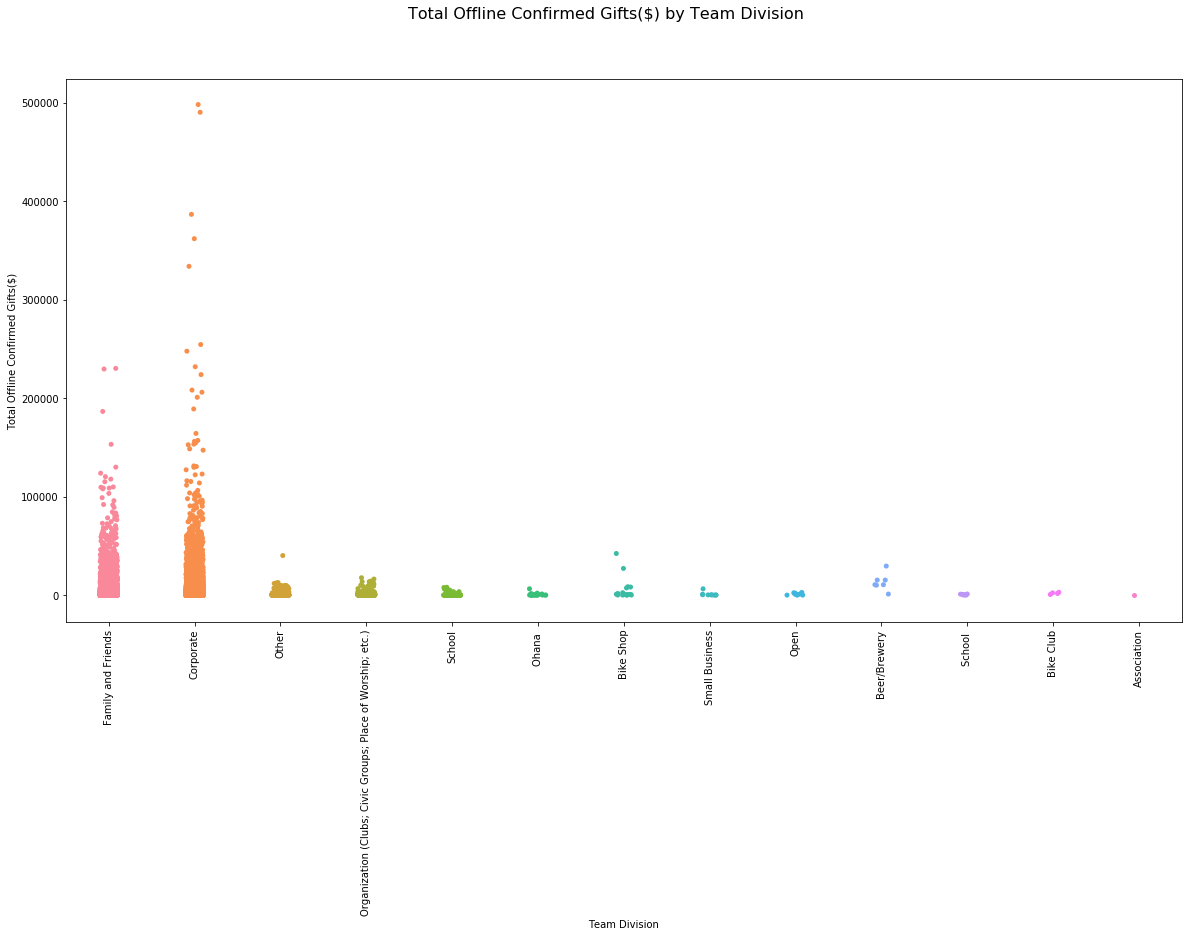

In [43]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Team Division', y="Total Offline Confirmed Gifts($)", data=biketeams, order = biketeams['Team Division'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total Offline Confirmed Gifts($) by Team Division', fontsize=16)



Text(0.5,0.98,'Total Online Gifts($) by Team Division')

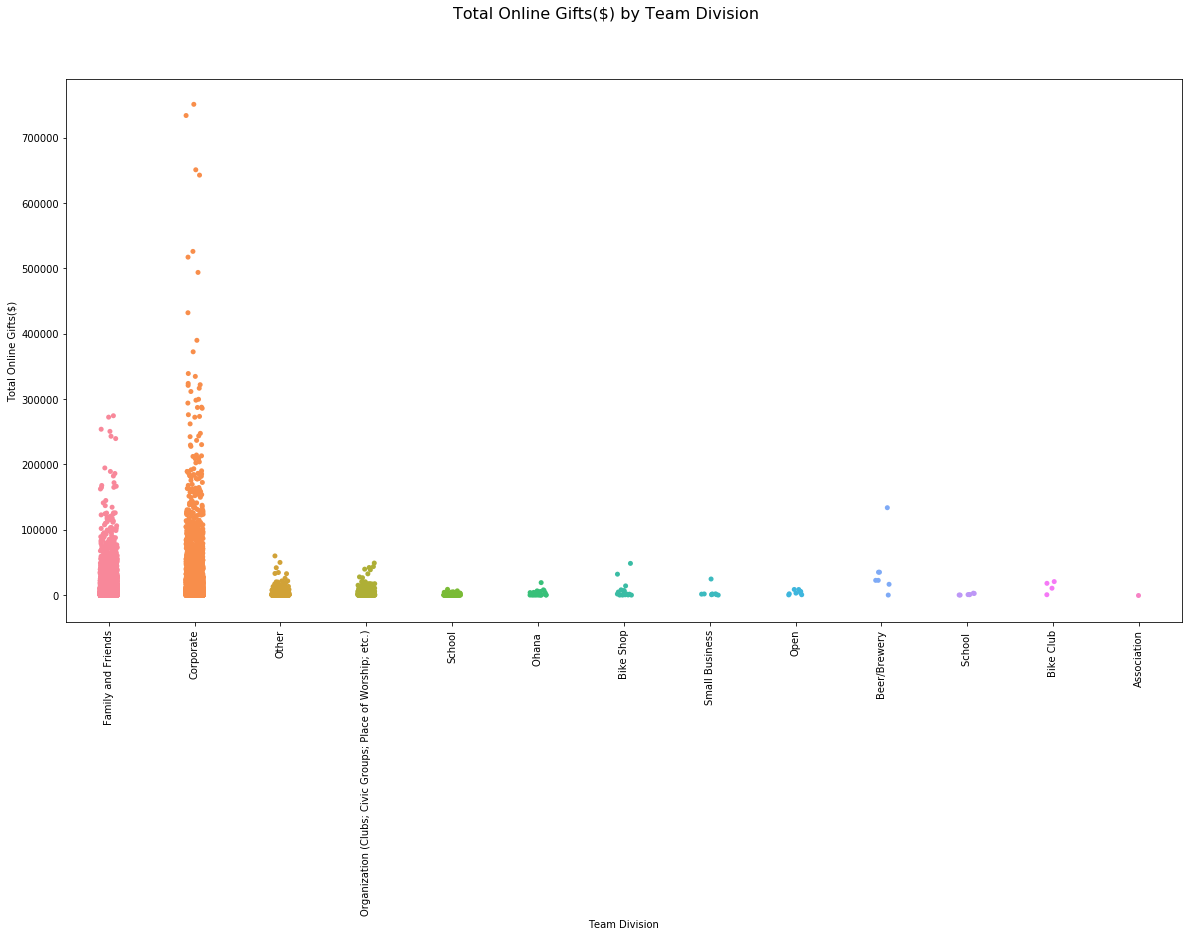

In [45]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Team Division', y="Total Online Gifts($)", data=biketeams, order = biketeams['Team Division'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Total Online Gifts($) by Team Division', fontsize=16)



Text(0.5,0.98,'Team Total Confirmed ($) by Fiscal Year and Team Division')

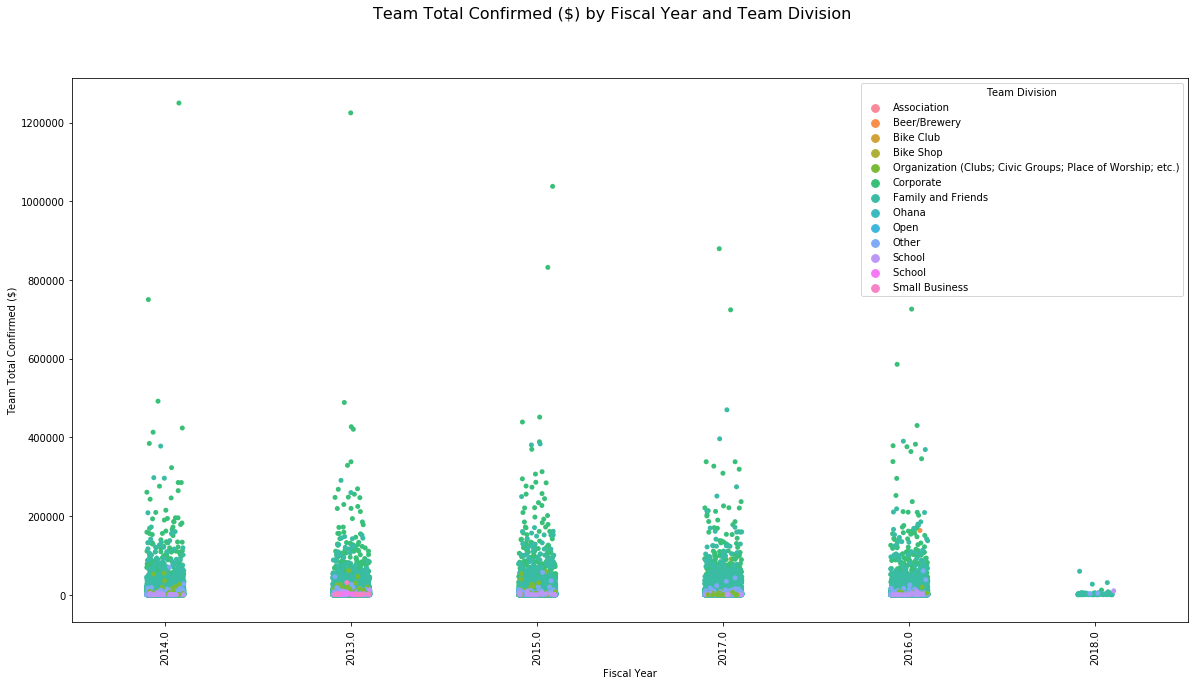

In [48]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Fiscal Year', y="Team Total Confirmed ($)", hue="Team Division",data=biketeams, order = biketeams['Fiscal Year'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Team Total Confirmed ($) by Fiscal Year and Team Division', fontsize=16)



Text(0.5,0.98,'Team Total Confirmed ($) by Team Division and Previous Event Fiscal Year')

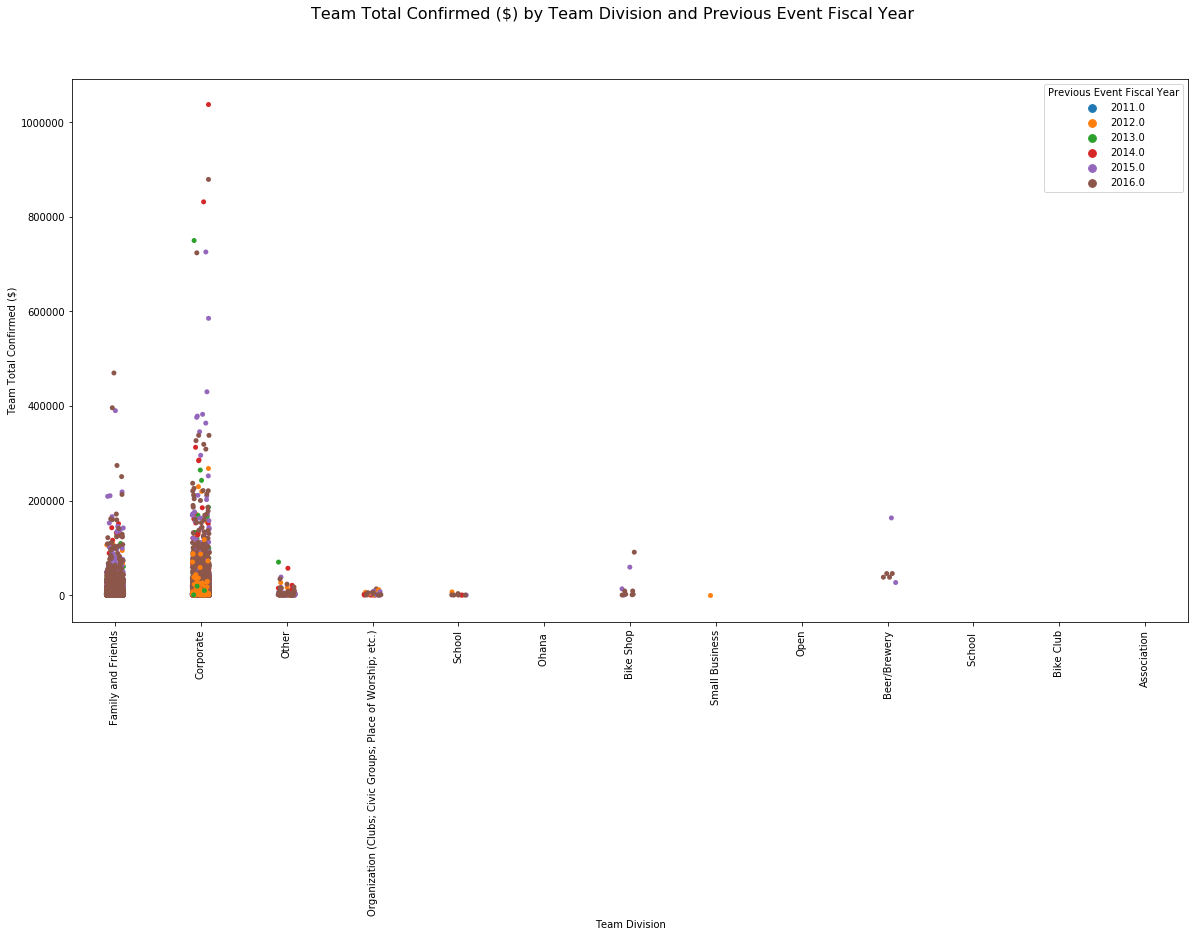

In [60]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Team Division', y="Team Total Confirmed ($)", hue="Previous Event Fiscal Year",data=biketeams, order = biketeams['Team Division'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Team Total Confirmed ($) by Team Division and Previous Event Fiscal Year', fontsize=16)



In [34]:
#biketeams['Team Creation Date','Team Captain Contact ID','Captain Email Domain','Team Captain Accept Email','Team Division','Company','Number of Participants','Total Fees Paid','Team Total Confirmed ($)','Total Online Gifts($)','Total Offline Confirmed Gifts($)','Total Offline Unconfirmed Gifts($)','Team Goal($)','Total Confirmed Gifts in Team History($)','Previous Event Fiscal Year','Previous Event Internal Name','Previous Event Team Name','Previous Event Confirmed Gifts($)','Previous Event Team Members','Event Date','Fiscal Year']

# Describing Data

In [62]:
dummy = pd.get_dummies(biketeams['Team Division'])
biketeamsd = pd.concat([biketeams, dummy],axis=1)
biketeamsd.head()


,Event Type,Internal Event Name,Event ID,Team ID,Team Name,Team Creation Date,Team Captain Contact ID,Captain Email Domain,Team Captain Accept Email,Team Division,...,Bike Shop,Corporate,Family and Friends,Ohana,Open,Organization (Clubs; Civic Groups; Place of Worship; etc.),Other,School,School,Small Business
0,Bike,ILD Bike MS: Tour de Farms 2013,20718,331040,Neighbors of the West Loop,2013-02-28 16:59:00,9947627.0,aol.com,1.0,Association,...,0,0,0,0,0,0,0,0,0,0
1,Bike,NCT 2016 Bike MS: Breakaway to the Beach,27693,457415,Team Left Hand,2015-12-02 17:59:00,14708446.0,gmail.com,1.0,Beer/Brewery,...,0,0,0,0,0,0,0,0,0,0
2,Bike,NCT 2016 Bike MS: Breakaway to the Beach,27693,457565,Unknown-Dornier Cycling,2015-12-04 04:30:00,8688799.0,gmail.com,1.0,Beer/Brewery,...,0,0,0,0,0,0,0,0,0,0
3,Bike,NCT 2016 Bike MS: Historic New Bern Ride,27695,480865,Foothills Brewing Chain Gang,2016-03-24 12:16:00,5340808.0,hotmail.com,1.0,Beer/Brewery,...,0,0,0,0,0,0,0,0,0,0
4,Bike,NCT 2016 Bike MS: Historic New Bern Ride,27695,455764,TeamCBC,2015-11-16 11:13:00,14726277.0,rocketmail.com,1.0,Beer/Brewery,...,0,0,0,0,0,0,0,0,0,0


In [63]:
biketeamsd.describe()

,Event ID,Team ID,Team Captain Contact ID,Team Captain Accept Email,Number of Participants,Total Fees Paid,Team Total Confirmed ($),Total Online Gifts($),Total Offline Confirmed Gifts($),Total Offline Unconfirmed Gifts($),...,Bike Shop,Corporate,Family and Friends,Ohana,Open,Organization (Clubs; Civic Groups; Place of Worship; etc.),Other,School,School,Small Business
count,33132.000000,33132.000000,3.258000e+04,32580.000000,33132.000000,33132.000000,3.313100e+04,33132.000000,33132.000000,33132.000000,...,33132.000000,33132.000000,33132.000000,33132.000000,33132.000000,33132.000000,33132.000000,33132.000000,33132.000000,33132.000000
mean,24480.767777,411722.021248,8.953652e+06,0.752732,10.701074,440.104223,9.003722e+03,6320.985665,2682.467439,101.388737,...,0.000483,0.231981,0.653175,0.000694,0.000272,0.010202,0.018954,0.003048,0.000211,0.000272
std,3081.189125,67696.166584,4.614824e+06,0.431431,21.691457,1512.024957,2.845762e+04,19529.446091,10539.766637,791.310748,...,0.021970,0.422103,0.475967,0.026339,0.016480,0.100488,0.136366,0.055129,0.014534,0.016480
min,17966.000000,266344.000000,1.566043e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22247.000000,353140.500000,4.813076e+06,1.000000,2.000000,55.000000,6.646250e+02,405.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25096.000000,405873.500000,9.622729e+06,1.000000,5.000000,140.000000,2.235000e+03,1600.000000,350.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27091.000000,466838.250000,1.280501e+07,1.000000,10.000000,340.000000,6.694725e+03,4920.962500,1571.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,29050.000000,538680.000000,1.636517e+07,1.000000,725.000000,71200.000000,1.249482e+06,751129.190000,498352.720000,39638.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
biketeamsd.corr()

,Event ID,Team ID,Team Captain Contact ID,Team Captain Accept Email,Number of Participants,Total Fees Paid,Team Total Confirmed ($),Total Online Gifts($),Total Offline Confirmed Gifts($),Total Offline Unconfirmed Gifts($),...,Bike Shop,Corporate,Family and Friends,Ohana,Open,Organization (Clubs; Civic Groups; Place of Worship; etc.),Other,School,School,Small Business
Event ID,1.000000,0.966167,0.174180,0.110638,-0.023998,-0.014504,0.001186,0.006145,-0.008220,0.018206,...,0.020648,0.004960,0.012379,-0.015999,-0.013222,-0.059201,0.023898,-0.017236,-0.024763,-0.020130
Team ID,0.966167,1.000000,0.221996,0.102518,-0.076218,-0.049011,-0.043220,-0.038158,-0.046030,0.000749,...,0.019539,-0.009745,0.032549,-0.019743,-0.015364,-0.048062,0.027359,-0.002496,-0.018010,-0.021864
Team Captain Contact ID,0.174180,0.221996,1.000000,0.005830,-0.089666,-0.044258,-0.092679,-0.084606,-0.093484,-0.043239,...,-0.000452,0.034565,-0.013851,0.010572,0.004120,0.015950,0.025706,0.026458,0.004710,0.003481
Team Captain Accept Email,0.110638,0.102518,0.005830,1.000000,0.045371,0.035750,0.051822,0.051701,0.044101,0.016006,...,-0.000965,0.006037,-0.010767,0.001841,-0.007597,-0.011784,-0.006625,0.002975,-0.006161,0.000965
Number of Participants,-0.023998,-0.076218,-0.089666,0.045371,1.000000,0.821095,0.821327,0.838326,0.664213,0.295823,...,0.011260,0.225426,-0.214233,-0.005924,0.001156,0.002493,-0.027482,-0.002847,-0.004682,-0.000533
Total Fees Paid,-0.014504,-0.049011,-0.044258,0.035750,0.821095,1.000000,0.792146,0.826902,0.606593,0.249815,...,0.002812,0.208798,-0.175869,-0.006380,-0.003114,-0.009835,-0.023791,-0.012135,-0.002130,-0.003372
Team Total Confirmed ($),0.001186,-0.043220,-0.092679,0.051822,0.821327,0.792146,1.000000,0.971767,0.899371,0.369970,...,0.004241,0.178149,-0.155231,-0.004918,-0.002220,-0.014640,-0.028167,-0.014513,-0.003770,-0.002491
Total Online Gifts($),0.006145,-0.038158,-0.084606,0.051701,0.838326,0.826902,0.971767,1.000000,0.770828,0.354698,...,0.002137,0.186692,-0.161830,-0.004425,-0.001849,-0.013709,-0.027669,-0.015332,-0.003872,-0.002152
Total Offline Confirmed Gifts($),-0.008220,-0.046030,-0.093484,0.044101,0.664213,0.606593,0.899371,0.770828,1.000000,0.341635,...,0.007492,0.135085,-0.119276,-0.005078,-0.002567,-0.014123,-0.024779,-0.010775,-0.003002,-0.002737
Total Offline Unconfirmed Gifts($),0.018206,0.000749,-0.043239,0.016006,0.295823,0.249815,0.369970,0.354698,0.341635,1.000000,...,0.004904,0.069299,-0.048469,-0.000943,-0.000561,-0.007074,-0.013711,-0.006694,-0.001863,-0.001348


In [78]:
# counting 1 values
print((biketeams[['Team Creation Date','Team Captain Contact ID','Captain Email Domain','Team Captain Accept Email','Team Division','Company','Number of Participants','Total Fees Paid','Team Total Confirmed ($)','Total Online Gifts($)','Total Offline Confirmed Gifts($)','Total Offline Unconfirmed Gifts($)','Team Goal($)','Total Confirmed Gifts in Team History($)','Previous Event Fiscal Year','Previous Event Internal Name','Previous Event Team Name','Previous Event Confirmed Gifts($)','Previous Event Team Members','Event Date','Fiscal Year']] == 1).sum())



Team Creation Date                              0
Team Captain Contact ID                         0
Captain Email Domain                            0
Team Captain Accept Email                   24524
Team Division                                   0
Company                                         0
Number of Participants                       4515
Total Fees Paid                                 1
Team Total Confirmed ($)                        4
Total Online Gifts($)                           2
Total Offline Confirmed Gifts($)                5
Total Offline Unconfirmed Gifts($)              6
Team Goal($)                                    5
Total Confirmed Gifts in Team History($)        4
Previous Event Fiscal Year                      0
Previous Event Internal Name                    0
Previous Event Team Name                        0
Previous Event Confirmed Gifts($)               1
Previous Event Team Members                   534
Event Date                                      0


# FIRST PRIORITY: CORPORATE ACQUISITION
  * What are the greatest growth opportunities for new corporate teams?
  * Can we apply those opportunities to specific rides/markets, especially our biggest events?
  * What industries have had the strongest involvement in Bike MS in the last five years?
  * What occupations were responsible for most of our fundraising?
  * Can we tie together these industries and occupations to identify gaps/opportunities?
  * What is the common denominator for our top performing corporate teams? (Is it industry, culture, executive involvement, connection to MS, other?)
  * Can we quantify the effect competing events are having in our top markets? 
Top competitors:
   1. Best Buddies
     * HYANNIS PORT June 2, 2018 Boston to Hyannis Port, MA
     * HEARST CASTLE September 8, 2018 San Simeon, CA
     * MIAMI November 16, 2018 Miami, FL
   2. Peddle the Cause
     * Louis
     * San Diego
   3. Pelatonia – OH
   4. PanMass Challenge - Boston
   5. ADA – Tour de Cure
   6. Jude Children’s Research Hospital
   7. JDRF Ride to Cure Diabetes
   8. Cycle for Life - Cystic Fibrosis Foundation
   9. Ride to Recovery
   10. Virtual Cycling
   11. Athletic Club Stationary Cycling Relays
   12. American Cancer Society
   13. Leukemia and Lymphoma Society – Team in Training

# SECOND PRIORITY: DIGITAL/SOCIAL ACQUISITION
  * What are the greatest opportunities for digital marketing investments? Where have we seen the greatest ROI?
  * Once someone is registered, what tactics and behaviors drive fundraising, and at what times leading up to the event?
  * What behavioral data do you see about usage of our fundraising tools and how it may or may not relate to performance of top fundraisers?
  * Despite increasing our digital advertising spend, acquisition continues to trend downward overall. Why? Is it an issue of needing more traffic, better targeting, or a conversion rate issue that needs to be addressed through the registration process? What can we do to reverse the trend?


# FINALLY:
  * As you studied this data, is there something else that came up as an insight into our operations that the questions above do not capture? 


# Descriptive Analytics